## Notebook for comparing MD and ML predictions for OOD $\sigma$

**Modified on 20th January, 2023; modified on 24th February, 2024**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import seaborn as sns
import os, sys
from sklearn.metrics import mean_squared_error
from rdkit.Chem import AllChem, DataStructs, PandasTools
from rdkit import Chem

In [2]:
%%bash
pwd
ls -ltr

/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Science-rev-1/other-manuscript-plots
total 2584
-rw-r--r--@ 1 riteshk  staff   87316 Feb 23 05:13 bar_ml_comparison_cond_022324.eps
-rw-------@ 1 riteshk  staff  162976 Feb 23 05:13 summary_all_models_cond.ipynb
-rw-r--r--@ 1 riteshk  staff   87322 Feb 23 05:13 bar_ml_comparison_ce_022324.eps
-rw-------@ 1 riteshk  staff  152078 Feb 23 05:13 summary_all_models_ce.ipynb
-rw-r--r--@ 1 riteshk  staff   85812 Feb 23 09:29 bar_ml_comparison_oxstab_022324.eps
-rw-------@ 1 riteshk  staff  145949 Feb 23 10:20 summary_all_models_oxstab.ipynb
-rw-------@ 1 riteshk  staff     582 Feb 23 11:23 literature_ml_performance.csv
-rw-r--r--@ 1 riteshk  staff   23315 Feb 23 11:24 literature_ml_performance_022324.eps
-rw-------@ 1 riteshk  staff  375462 Feb 23 11:24 compare_literature_ML_performance.ipynb
-rw-------@ 1 riteshk  staff     417 Feb 23 12:02 oxstab_expt_valid_mp_level_thf.csv
-rw-r--r--@ 1 riteshk  staff   2837

In [3]:
df = pd.read_csv('expt-ml-md-cond_ood.csv')
df

,solvent,MD,expt,smiles,unc_expt
0,E3F1,0.756886,1.150085,C(COCCOCCOCC(F)(F)F)(F)(F)F,0.047456
1,E4F1,0.773653,1.270252,C(COCCOCCOCC(F)(F)F)OCC(F)(F)F,0.065532
2,E5F1,0.476647,1.136868,C(COCCOCCOCCOCC(F)(F)F)OCC(F)(F)F,0.048953
3,E6F1,0.325749,0.956335,C(OCCOCCOCCOCC(F)(F)F)COCCOCC(F)(F)F,0.051486
4,E3F2,0.004790,0.272546,C(OCCOCC(C(F)(F)F)(F)F)COCC(C(F)(F)F)(F)F,0.040963
5,E5F2,0.081437,0.558985,C(OCCOCCOCC(C(F)(F)F)(F)F)COCCOCC(C(F)(F)F)(F)F,0.020930


In [4]:
path = '/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Science-rev-1/ionic-conductivity_2.1/dataset_v2.0/common-log-output/cdf-stratified-split-2-cv_2/deploy/final-ood-int-lit/' ## path for ionic conductivity model (Chemprop with RDKit features on strat-II split)

In [5]:
df_pred = pd.read_csv(path + 'preds_cond_ood_final_cdf_rd_strat2_cv_comm_s800_e3.csv')
df_add = pd.read_csv(path + 'cond_ood_final_add.csv')
df_pred['temperature'] = df_add['temperature']
df_pred['conc_salt'] = df_add['conc_salt']
df_pred

,solv_comb_sm,salt_sm,true_conductivity_log,class,group,conductivity_log,conductivity_log_ensemble_uncal_var,temperature,conc_salt
0,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.333390,Ether,in-house,0.397668,0.003130,80,1.0
1,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.297290,Ether,in-house,0.345643,0.003022,70,1.0
2,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.254010,Ether,in-house,0.285295,0.002885,60,1.0
3,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.202220,Ether,in-house,0.215715,0.002844,50,1.0
4,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.137990,Ether,in-house,0.135815,0.002826,40,1.0
...,...,...,...,...,...,...,...,...,...
166,CS(=O)(=O)OCC(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.503791,Others,literature,0.048418,0.015965,25,1.2
167,CS(=O)(=O)OCC(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.474216,Others,literature,0.019113,0.015392,25,1.0
168,CO[Si](C)(CCC(F)(F)F)OC,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.585027,Others,literature,0.326589,0.006349,25,1.0
169,CO[Si](C)(CCC(F)(F)F)OC,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,-0.356547,Others,literature,0.137253,0.051541,25,3.0


In [6]:
e3f1 = df_pred.loc[df_pred['solv_comb_sm'] == 'C(COCCOCCOCC(F)(F)F)(F)(F)F'].loc[df_pred['temperature'] == 30].loc[df_pred['conc_salt'] == 1.0]
e3f1

,solv_comb_sm,salt_sm,true_conductivity_log,class,group,conductivity_log,conductivity_log_ensemble_uncal_var,temperature,conc_salt
5,C(COCCOCCOCC(F)(F)F)(F)(F)F,[Li+].[N-](S(=O)(=O)F)S(=O)(=O)F,0.06073,Ether,in-house,0.042124,0.003053,30,1.0


In [7]:
e4f1 = df_pred.loc[df_pred['solv_comb_sm'] == 'C(COCCOCCOCC(F)(F)F)OCC(F)(F)F'].loc[df_pred['temperature'] == 30].loc[df_pred['conc_salt'] == 1.0]
e5f1 = df_pred.loc[df_pred['solv_comb_sm'] == 'C(COCCOCCOCCOCC(F)(F)F)OCC(F)(F)F'].loc[df_pred['temperature'] == 30].loc[df_pred['conc_salt'] == 1.0]
e6f1 = df_pred.loc[df_pred['solv_comb_sm'] == 'C(OCCOCCOCCOCC(F)(F)F)COCCOCC(F)(F)F'].loc[df_pred['temperature'] == 30].loc[df_pred['conc_salt'] == 1.0]
e3f2 = df_pred.loc[df_pred['solv_comb_sm'] == 'C(OCCOCC(C(F)(F)F)(F)F)COCC(C(F)(F)F)(F)F'].loc[df_pred['temperature'] == 30].loc[df_pred['conc_salt'] == 1.0]
e5f2 = df_pred.loc[df_pred['solv_comb_sm'] == 'C(OCCOCCOCC(C(F)(F)F)(F)F)COCCOCC(C(F)(F)F)(F)F'].loc[df_pred['temperature'] == 30].loc[df_pred['conc_salt'] == 1.0]

In [8]:
e3f1_cond = list(e3f1['conductivity_log']); e3f1_cond_unc_log = list(e3f1['conductivity_log_ensemble_uncal_var'])
e4f1_cond = list(e4f1['conductivity_log']); e4f1_cond_unc_log = list(e3f1['conductivity_log_ensemble_uncal_var'])
e5f1_cond = list(e5f1['conductivity_log']); e5f1_cond_unc_log = list(e3f1['conductivity_log_ensemble_uncal_var'])
e6f1_cond = list(e6f1['conductivity_log']); e6f1_cond_unc_log = list(e3f1['conductivity_log_ensemble_uncal_var'])
e3f2_cond = list(e3f2['conductivity_log']); e3f2_cond_unc_log = list(e3f1['conductivity_log_ensemble_uncal_var'])
e5f2_cond = list(e5f2['conductivity_log']); e5f2_cond_unc_log = list(e3f1['conductivity_log_ensemble_uncal_var'])
e4f1_cond_unc_log

[0.0030527812033088]

In [10]:
## not used
# def convert_error_log_normal(log_prop, log_error, n=3):
#     """function to convert error bar (standard deviation) values from log scale to normal scale:
#     log_prop: property value in log scale
#     log_error: error (standard deviation) value in log scale
#     n: number of trials used in measuring property (usually 3)
#     ref:- https://stats.stackexchange.com/questions/123514/calculating-standard-error-after-a-log-transform"""
#     return np.exp(log_prop) * (log_error/np.sqrt(n-1))

In [9]:
def convert_log_normal_uncer(value, uncer):
    cond_log = value
    cond_unc_log = uncer
    cond_log_high = cond_log + cond_unc_log; cond_log_low = cond_log - cond_unc_log
    cond_normal_high = 10**cond_log_high; cond_normal_low = 10**cond_log_low
    cond_unc_normal = cond_normal_high - cond_normal_low
    return cond_unc_normal

In [10]:
e3f1_cond_unc = convert_log_normal_uncer(e3f1_cond[0], e3f1_cond_unc_log[0])
e4f1_cond_unc = convert_log_normal_uncer(e4f1_cond[0], e4f1_cond_unc_log[0])
e5f1_cond_unc = convert_log_normal_uncer(e5f1_cond[0], e5f1_cond_unc_log[0])
e6f1_cond_unc = convert_log_normal_uncer(e6f1_cond[0], e6f1_cond_unc_log[0])
e3f2_cond_unc = convert_log_normal_uncer(e3f2_cond[0], e3f2_cond_unc_log[0])
e5f2_cond_unc = convert_log_normal_uncer(e5f2_cond[0], e5f2_cond_unc_log[0])

In [11]:
ml_cond = [10**e3f1_cond[0], 10**e4f1_cond[0], 10**e5f1_cond[0], 10**e6f1_cond[0], 10**e3f2_cond[0], 10**e5f2_cond[0]] ## ML data entered in log scale in df_pred, but in normal scale in df
ml_cond_unc = [e3f1_cond_unc, e4f1_cond_unc, e5f1_cond_unc, e6f1_cond_unc, e3f2_cond_unc, e5f2_cond_unc]
ml_cond = list(ml_cond)
ml_cond_unc = list(ml_cond_unc)
ml_cond

[1.1018533822380292,
 0.9547321521409653,
 0.8109117250621296,
 0.6497778200359566,
 0.26895144359280126,
 0.3722063484416241]

In [22]:
# expt_unc_e3f1 = convert_error_log_normal(np.log(df['expt'][0]), df['unc_expt'][0])
# expt_unc_e4f1 = convert_error_log_normal(np.log(df['expt'][1]), df['unc_expt'][1])
# expt_unc_e5f1 = convert_error_log_normal(np.log(df['expt'][2]), df['unc_expt'][2])
# expt_unc_e6f1 = convert_error_log_normal(np.log(df['expt'][3]), df['unc_expt'][3])
# expt_unc_e3f2 = convert_error_log_normal(np.log(df['expt'][4]), df['unc_expt'][4])
# expt_unc_e5f2 = convert_error_log_normal(np.log(df['expt'][5]), df['unc_expt'][5])
# expt_cond_unc = [expt_unc_e3f1, expt_unc_e4f1, expt_unc_e5f1, expt_unc_e6f1, expt_unc_e3f2, expt_unc_e5f2]

In [12]:
df['ML'] = ml_cond
df['unc_ML'] = ml_cond_unc
# df['unc_expt'] = expt_cond_unc
df

,solvent,MD,expt,smiles,unc_expt,ML,unc_ML
0,E3F1,0.756886,1.150085,C(COCCOCCOCC(F)(F)F)(F)(F)F,0.047456,1.101853,0.015491
1,E4F1,0.773653,1.270252,C(COCCOCCOCC(F)(F)F)OCC(F)(F)F,0.065532,0.954732,0.013422
2,E5F1,0.476647,1.136868,C(COCCOCCOCCOCC(F)(F)F)OCC(F)(F)F,0.048953,0.810912,0.011400
3,E6F1,0.325749,0.956335,C(OCCOCCOCCOCC(F)(F)F)COCCOCC(F)(F)F,0.051486,0.649778,0.009135
4,E3F2,0.004790,0.272546,C(OCCOCC(C(F)(F)F)(F)F)COCC(C(F)(F)F)(F)F,0.040963,0.268951,0.003781
5,E5F2,0.081437,0.558985,C(OCCOCCOCC(C(F)(F)F)(F)F)COCCOCC(C(F)(F)F)(F)F,0.020930,0.372206,0.005233


In [13]:
rmse_md = np.sqrt(mean_squared_error(df['expt'], df['MD']))
rmse_ml = np.sqrt(mean_squared_error(df['expt'], df['ML']))
print(rmse_md, rmse_ml)

0.5057161016942018 0.2369961485684013


In [14]:
blue = (0, 0.576, 0.902) # 0, 147, 230
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
anvil = (0.298, 0.78, 0.77) # 76, 199, 196

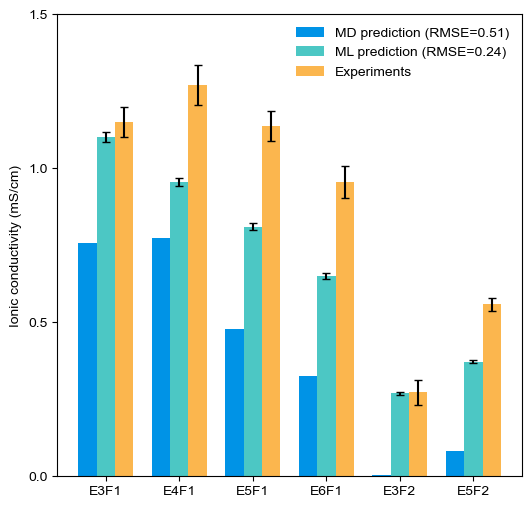

In [22]:
# Set position of bar on X axis
barWidth = 0.25
fig, ax = plt.subplots(figsize=(6,6))
br1 = np.arange(len(df),dtype=object)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
ax.bar(br1, list(df['MD']), width=barWidth, label='MD prediction (RMSE={:.2f})'.format(rmse_md), color=blue)
ax.bar(br2, list(df['ML']), width=barWidth, label='ML prediction (RMSE={:.2f})'.format(rmse_ml), color=anvil, yerr=df['unc_ML'], capsize=3)
ax.bar(br3, list(df['expt']), width=barWidth, label='Experiments', color=orange, yerr=df['unc_expt'], capsize=3)
# ax.set_aspect(aspect=4)
plt.legend(frameon=False)
plt.ylabel('Ionic conductivity (mS/cm)')
plt.xticks([r + barWidth for r in range(len(df))],
        ['E3F1', 'E4F1', 'E5F1', 'E6F1', 'E3F2', 'E5F2'])
ax.set_yticks([0.0,0.5,1.0,1.5])
ax.set_yticklabels([0.0,0.5,1.0,1.5])
plt.savefig('fig3i.eps', dpi=300)